<a href="https://colab.research.google.com/github/SiharaVikashIITD/Data-Analytics/blob/main/Sales_Pred_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The dataset provided contains information about the advertising expenditures of a company on various platforms (TV, Radio, newspapers) and the corresponding sales of a product. Here's an explanation of the dataset:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Replace 'advertising_sales_data.xlsx' with the name
file_name = 'advertising_sales_data.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_name)

# Display the first 5 rows
print(df.head())

  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9


###1.	What is the average amount spent on TV advertising in the dataset?

In [ ]:
Avg_TV =df['TV'].mean()
print(Avg_TV)

147.0425


###2.	What is the correlation between radio advertising expenditure and product sales?

In [ ]:
corr_matrix=df[['Radio','Sales']].corr() #Matrix gives all the corr
print(corr_matrix)

          Radio     Sales
Radio  1.000000  0.349728
Sales  0.349728  1.000000


###3.	Which advertising medium has the highest impact on sales based on the dataset?

In [ ]:
df=df.drop('Campaign',axis=1)
correlation = df.corr()
highest_impact = correlation['Sales'][['TV', 'Radio', 'Newspaper']].idxmax()
print("Highest impact advertising medium:", highest_impact)

Highest impact advertising medium: TV


### 4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
# Handle missing values in X
X = X.fillna(X.mean()) #before splitting remove NaN or replace with mean or median

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=LinReg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
print(MSE)

2.9074318865000555


In [ ]:
R2_Score =r2_score(y_test ,y_pred)
print(R2_Score)

0.9059117026092904


MSE (Normalized): 2.9074318865000586
R2 Score (Normalized): 0.9059117026092903

<ipython-input-23-faa687751a24>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


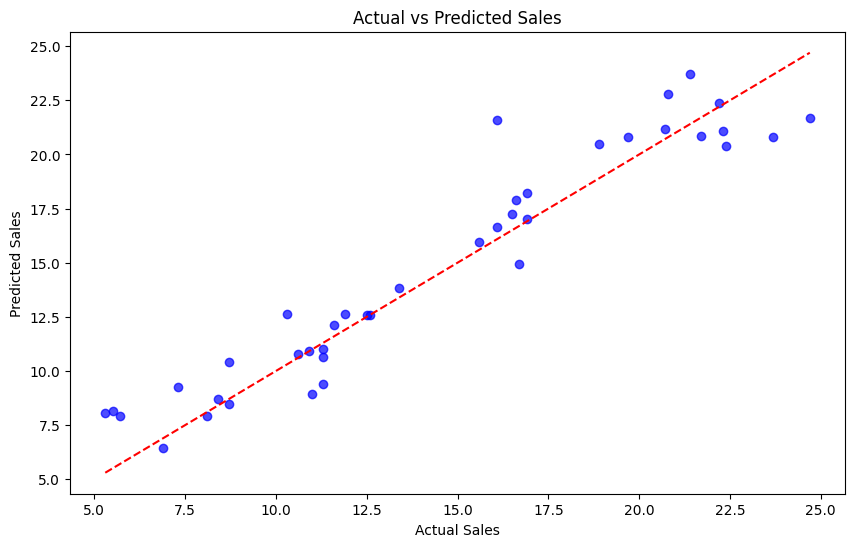

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

###5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

In [ ]:
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
predicted_sales = LinReg.predict(new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 19.871049209206635


### 6.	How does the performance of the linear regression model change when the dataset is normalized?

In [ ]:
## Performance of the model after normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split normalized dataset
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train model on normalized data
model_norm = LinearRegression()
model_norm.fit(X_train_norm, y_train_norm)

# Evaluate
y_pred_norm = model_norm.predict(X_test_norm)
mse_norm = mean_squared_error(y_test_norm, y_pred_norm)
r2_norm = r2_score(y_test_norm, y_pred_norm)
print("MSE (Normalized):", mse_norm)
print("R2 Score (Normalized):", r2_norm)

MSE (Normalized): 2.9074318865000586
R2 Score (Normalized): 0.9059117026092903


By Comparing last Digits of Error Metrices we can say

MSE(normalised) > MSE , Performence Decreased

R2_Score(normalised) < R2_Score , Performance Decreased
### Models Performence Decreased

### 7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [ ]:
# 7. Impact on sales prediction when only Radio and Newspaper are used as predictors
X_reduced = df[['Radio', 'Newspaper']]
X_reduced = X_reduced.fillna(X_reduced.mean())

# Split the reduced dataset
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


# Train the model on reduced predictors
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train_reduced)

# Evaluate the reduced model
y_pred_reduced = model_reduced.predict(X_test_reduced)
mse_reduced = mean_squared_error(y_test_reduced, y_pred_reduced)
r2_reduced = r2_score(y_test_reduced, y_pred_reduced)
print("MSE (Reduced):", mse_reduced)
print("R2 Score (Reduced):", r2_reduced)

MSE (Reduced): 27.50240015808231
R2 Score (Reduced): 0.10998637077378115


### MSE increases and R² Score decreases after using only Radio and Newspaper, it means the excluded predictor (TV) had a significant impact on sales, and its removal has reduced the model's performance.